<a href="https://colab.research.google.com/github/TuNguyen142/AL-13-2/blob/main/ti%E1%BB%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/bt al/tiền

/content/drive/MyDrive/bt al/tiền


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/bt al/tiền/Cash',
                                               target_size=(30,40), batch_size=32, class_mode='categorical')

Found 120 images belonging to 6 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'10000': 0, '100000': 1, '20000': 2, '5000': 3, '50000': 4, '500000': 5}

In [28]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(30,40,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(6,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
     

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

In [29]:
a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)
)

<ipython-input-29-d08e984be685>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, epochs=80, steps_per_epoch=len(training_set)


Epoch 1/80
4/4 [==============================] - 5s 769ms/step - loss: 4.5719 - accuracy: 0.1167
Epoch 2/80
4/4 [==============================] - 3s 864ms/step - loss: 2.2770 - accuracy: 0.2250
Epoch 3/80
4/4 [==============================] - 3s 788ms/step - loss: 1.8978 - accuracy: 0.2083
Epoch 4/80
4/4 [==============================] - 4s 886ms/step - loss: 1.6652 - accuracy: 0.3750
Epoch 5/80
4/4 [==============================] - 3s 801ms/step - loss: 1.6133 - accuracy: 0.3667
Epoch 6/80
4/4 [==============================] - 3s 817ms/step - loss: 1.5202 - accuracy: 0.4417
Epoch 7/80
4/4 [==============================] - 5s 1s/step - loss: 1.3903 - accuracy: 0.4917
Epoch 8/80
4/4 [==============================] - 3s 806ms/step - loss: 1.1950 - accuracy: 0.5667
Epoch 9/80
4/4 [==============================] - 3s 783ms/step - loss: 1.1266 - accuracy: 0.5750
Epoch 10/80
4/4 [==============================] - 4s 1s/step - loss: 1.0219 - accuracy: 0.6083
Epoch 11/80
4/4 [========

In [31]:
model.save('/content/drive/MyDrive/bt al/tiền/Cash.h5')


In [32]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.01944015361368656
Train Accuracy 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

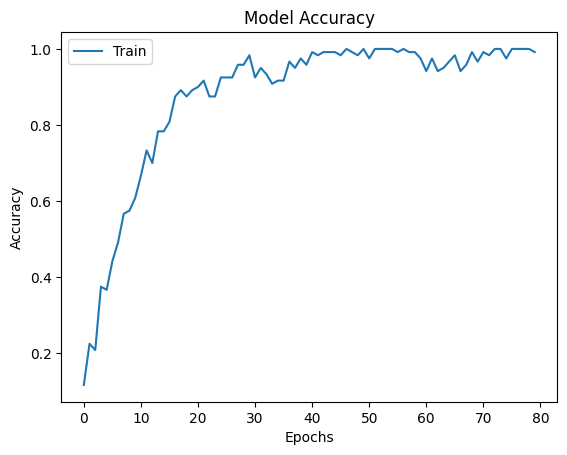

In [34]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(a.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [36]:
model1= load_model('/content/drive/MyDrive/bt al/tiền/Cash.h5')

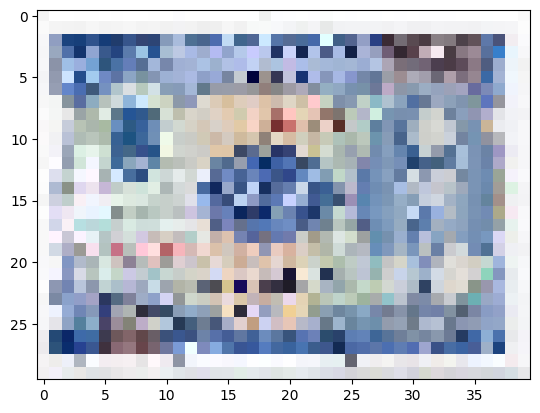

In [38]:
img = load_img('/content/drive/MyDrive/bt al/tiền/test/tiền.jpg', target_size=(30,40))
plt.imshow(img)

In [39]:
class_name=['10000', '100000', '20000', '5000', '50000', '500000']

In [40]:
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,30,40,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
class_name[y_classes[0]]

1/1 [==============================] - 0s 181ms/step
[[7.0891801e-05 7.7627413e-07 3.5443671e-02 9.6439892e-01 1.7399342e-11
  8.5796179e-05]]


'5000'